## **Project Name** - **Smart Asset Risk Advisor**






##### **Project Type**    - ML Classification & Decision Support System

#### **Project summary**

The Smart Asset Risk Advisor is an intelligent, ML-powered system designed to help organizations monitor and manage the health of their industrial assets using sensor data. The goal is to predict the risk level of assets (High, Medium, Low) based on real-time inputs like temperature, pressure, vibration, and runtime hours, and then recommend the most appropriate maintenance action, whether to fix immediately, monitor, or ignore.

This project simulates a real-world industrial setting where quick and reliable risk assessment can reduce unplanned downtime, improve asset performance, and support smarter decision-making.

Multiple classification models were trained and compared, including:

Random Forest Classifier

Logistic Regression

K-Nearest Neighbors

The system also includes:

Action Suggestion Logic based on predicted risk

Explainability using SHAP to highlight which features influence the predictions the most

Visual comparison of model performance using precision, recall, and F1-score

# **GitHub Link -**

# **Problem Statement**

In industries where machines and equipment operate continuously, unexpected failures can lead to costly downtime and safety risks. Traditional maintenance often reacts after a fault occurs, rather than predicting and preventing it. The challenge is to create a system that can intelligently assess the condition of an asset in real-time using sensor data, such as temperature, vibration, pressure, and runtime and predict its risk level. Based on this prediction, the system should also suggest the most appropriate action, helping teams make faster, data-driven Decisions to optimize maintenance, reduce disruptions, and improve asset reliability.

# ***Let's Begin !***

### Know Your Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import shap
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("/content/asset_readings.csv")
display(df.head())

,temperature,vibration,pressure,runtime_hours,risk_level
0,68.97,3.36,22.03,246,Low
1,63.89,3.56,27.00,523,High
2,70.18,4.08,30.03,1043,Medium
3,77.18,4.05,30.23,329,Low
4,63.13,1.62,27.75,294,High


### Dataset Rows & Columns count

In [4]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])


Total Rows: 200
Total Columns: 5


#### Dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    200 non-null    float64
 1   vibration      200 non-null    float64
 2   pressure       200 non-null    float64
 3   runtime_hours  200 non-null    int64  
 4   risk_level     200 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


#### Dataset Duplicate Value Count

In [6]:
duplicates = df.duplicated().sum()
print("Total Duplicate Rows:", duplicates)

Total Duplicate Rows: 0


#### Missing Values/Null Values Count

In [7]:
missing = df.isnull().sum()
print("Missing Values in Each Column:\n", missing)

Missing Values in Each Column:
 temperature      0
vibration        0
pressure         0
runtime_hours    0
risk_level       0
dtype: int64


#### Visualizing the missing values

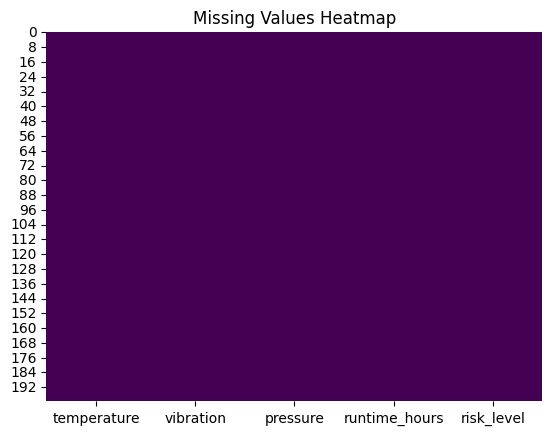

In [8]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#### Check Unique Values for Each Variable

In [10]:
for column in df.columns:
    unique_vals = df[column].nunique()
    print(f"{column} → {unique_vals} unique values")
print("Unique Risk Levels:", df['risk_level'].unique())


temperature → 192 unique values
vibration → 156 unique values
pressure → 189 unique values
runtime_hours → 191 unique values
risk_level → 3 unique values
Unique Risk Levels: ['Low' 'High' 'Medium']


#### Check for outliers using boxplots

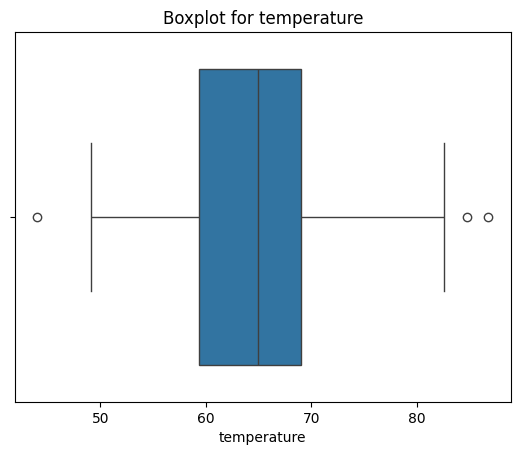

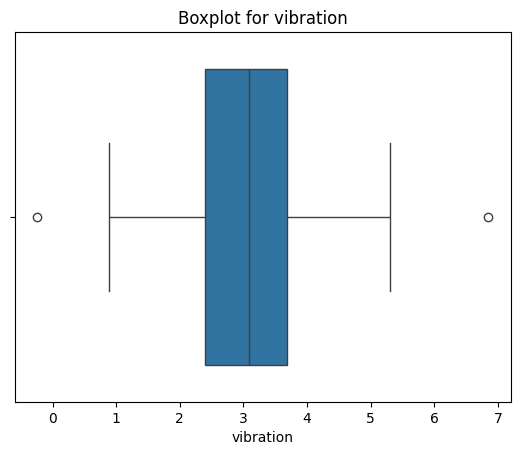

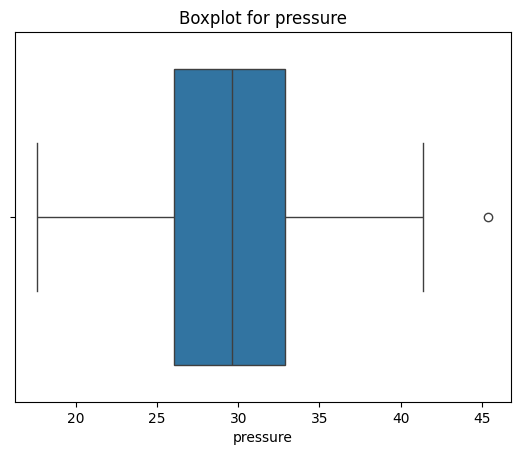

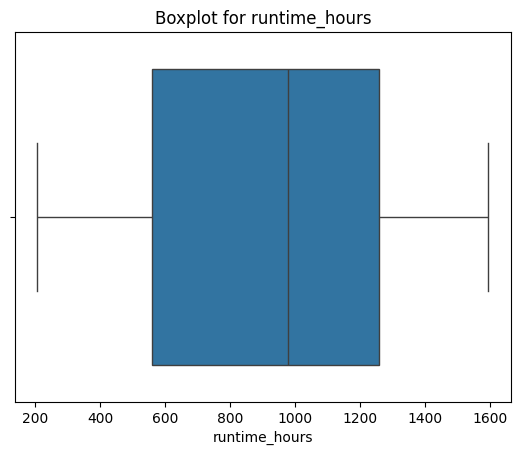

In [11]:
numeric_cols = ['temperature', 'vibration', 'pressure', 'runtime_hours']

for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


## ***ML Model Implementation***

###Random Forest

#### Train-Test Split

In [12]:
X = df.drop('risk_level', axis=1)
y = df['risk_level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training Set Size:", X_train.shape[0])
print("Test Set Size:", X_test.shape[0])


Training Set Size: 160
Test Set Size: 40


#### Model Training ( Random Forest Classifier)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(" Random Forest Model Training Completed!")


 Random Forest Model Training Completed!


#### Model Evaluation  (Random Forest)

In [15]:
y_pred_rf = rf_model.predict(X_test)

print(" Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))


 Classification Report (Random Forest):

              precision    recall  f1-score   support

        High       0.20      0.11      0.14         9
         Low       0.38      0.53      0.44        19
      Medium       0.00      0.00      0.00        12

    accuracy                           0.28        40
   macro avg       0.19      0.21      0.20        40
weighted avg       0.23      0.28      0.24        40



###Logistic Regression

#### Scaling Features

In [19]:
# Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#### Model Training – Logistic Regression

In [21]:
 log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

print(" Logistic Regression Training Completed ")

 Logistic Regression Training Completed 


#### Model Evaluation – Logistic Regression

In [23]:
y_pred_logreg = log_reg.predict(X_test_scaled)

print(" Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_logreg))

 Classification Report (Logistic Regression):

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         9
         Low       0.45      0.89      0.60        19
      Medium       0.00      0.00      0.00        12

    accuracy                           0.42        40
   macro avg       0.15      0.30      0.20        40
weighted avg       0.21      0.42      0.28        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###KNN

#### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train)
X_test_knn = scaler_knn.transform(X_test)


#### Model Training – K-Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train)

print("KNN Model Training Completed!")


KNN Model Training Completed!


#### Model Evaluation – KNN

In [35]:
y_pred_knn = knn.predict(X_test_knn)

print(" Classification Report (KNN):\n")
print(classification_report(y_test, y_pred_knn))


 Classification Report (KNN):

              precision    recall  f1-score   support

        High       0.08      0.11      0.10         9
         Low       0.33      0.42      0.37        19
      Medium       0.00      0.00      0.00        12

    accuracy                           0.23        40
   macro avg       0.14      0.18      0.16        40
weighted avg       0.18      0.23      0.20        40



### Manual Model Comparison Summary

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors'],
    'Accuracy': [0.28, 0.42, 0.23],
    'F1 Score': [0.24, 0.28, 0.20]
})

results_summary


,Model,Accuracy,F1 Score
0,Random Forest,0.28,0.24
1,Logistic Regression,0.42,0.28
2,K-Nearest Neighbors,0.23,0.20


### Visualize F1 Score Comparison

/tmp/ipython-input-40-2572454399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_summary, x='F1 Score', y='Model', palette='rocket')


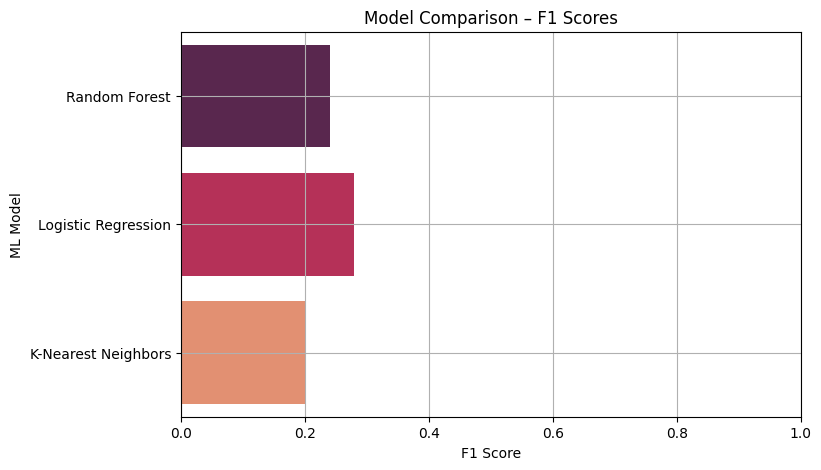

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(data=results_summary, x='F1 Score', y='Model', palette='rocket')
plt.title("Model Comparison – F1 Scores")
plt.xlabel("F1 Score")
plt.ylabel("ML Model")
plt.xlim(0, 1)
plt.grid(True)
plt.show()


## ***Action Suggestion Logic(Random Forest Predictions)***

In [41]:
def suggest_action(risk):
    if risk == 'High':
        return " Fix Immediately"
    elif risk == 'Medium':
        return " Monitor Closely"
    else:
        return " No Action Needed"

actions_rf = [suggest_action(risk) for risk in y_pred_rf]

results_df = pd.DataFrame({
    'Actual Risk Level': y_test.values,
    'Predicted Risk Level': y_pred_rf,
    'Suggested Action': actions_rf
})

results_df.head(10)


,Actual Risk Level,Predicted Risk Level,Suggested Action
0,High,High,Fix Immediately
1,Low,Low,No Action Needed
2,High,Low,No Action Needed
3,Low,High,Fix Immediately
4,Medium,Low,No Action Needed
5,Medium,Low,No Action Needed
6,Medium,Low,No Action Needed
7,Medium,Low,No Action Needed
8,Low,Low,No Action Needed
9,Low,Low,No Action Needed


## ***SHAP***


In [42]:
# Install SHAP
!pip install shap


###Random Forest

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Get feature importances from the model

In [67]:
importances = rf_model.feature_importances_
features = X_train.columns

#### Create a DataFrame for plotting

In [68]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#### Plot

/tmp/ipython-input-71-2088682498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


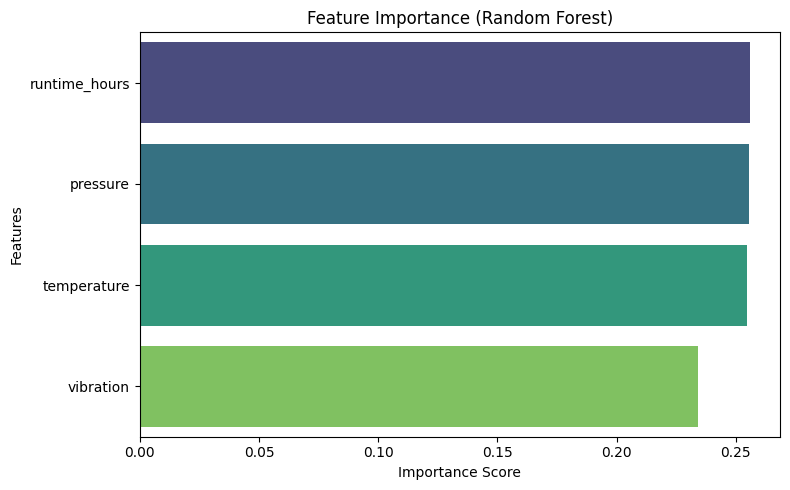

In [71]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

###Logistic regression

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Coefficients for logistic regression

In [77]:
coefs = log_reg.coef_[0]

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefs)
}).sort_values(by='Importance', ascending=False)

#### Plot

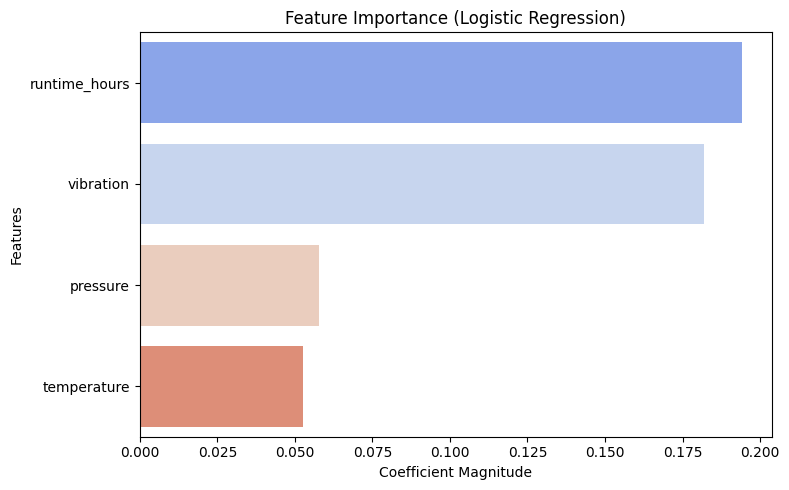

In [78]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# ***Save the File***

In [79]:
import joblib
joblib.dump(rf_model, 'risk_predictor.pkl')


['risk_predictor.pkl']